<a href="https://colab.research.google.com/github/mmartin46/Data_Science_Research/blob/main/MBTIScores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
# Mark 16:16

In [137]:
import pandas as pd
import altair as alt
from altair import Chart, X, Y, Color, Scale
import datetime as dt
import matplotlib.pyplot as plt
from pandas.core.common import random_state
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [138]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression

In [139]:
df = pd.read_csv('/content/mbti_1.csv')
df.dropna(inplace=True)


In [140]:
def char_count(df):
  df['char_count'] = df['posts'].str.len()
char_count(df)
df

,type,posts,char_count
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,4652
1,ENTP,'I'm finding the lack of me in these posts ver...,7053
2,INTP,'Good one _____ https://www.youtube.com/wat...,5265
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",6271
4,ENTJ,'You're fired.|||That's another silly misconce...,6111
...,...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...,5011
8671,ENFP,'So...if this thread already exists someplace ...,7902
8672,INTP,'So many questions when i do these things. I ...,5772
8673,INFP,'I am very conflicted right now when it comes ...,9479


In [141]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
swords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
swords

In [121]:
def stop_word_count(df):
  df['stopwords'] = df['posts'].apply(lambda w : len([w for w in w.split() if w in swords]))
stop_word_count(df)
df

,type,posts,char_count,stopwords
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,4652,221
1,ENTP,'I'm finding the lack of me in these posts ver...,7053,464
2,INTP,'Good one _____ https://www.youtube.com/wat...,5265,309
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",6271,430
4,ENTJ,'You're fired.|||That's another silly misconce...,6111,411
...,...,...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...,5011,332
8671,ENFP,'So...if this thread already exists someplace ...,7902,500
8672,INTP,'So many questions when i do these things. I ...,5772,366
8673,INFP,'I am very conflicted right now when it comes ...,9479,713


In [122]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [123]:
comp_scores = []
siA = SentimentIntensityAnalyzer()
df_len = int(df.axes[0][-1]) + 1

In [124]:
from textblob import TextBlob

In [125]:
for i in range(0, df_len):
  blob = TextBlob(df['posts'][i])
  sentiment = blob.sentiment.polarity
  comp_scores.append(sentiment)

In [126]:
df['sentiment'] = comp_scores

In [127]:
df

,type,posts,char_count,stopwords,sentiment
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,4652,221,0.145127
1,ENTP,'I'm finding the lack of me in these posts ver...,7053,464,0.163282
2,INTP,'Good one _____ https://www.youtube.com/wat...,5265,309,0.174137
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",6271,430,0.114959
4,ENTJ,'You're fired.|||That's another silly misconce...,6111,411,0.056805
...,...,...,...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...,5011,332,0.134898
8671,ENFP,'So...if this thread already exists someplace ...,7902,500,0.280931
8672,INTP,'So many questions when i do these things. I ...,5772,366,0.105284
8673,INFP,'I am very conflicted right now when it comes ...,9479,713,0.117591


In [128]:
df_list = []
names = list(df.columns)[2:]
for name in names:
  df_list.append((df.groupby(['type'], as_index=False)[name].mean()).sort_values(by=[name]))

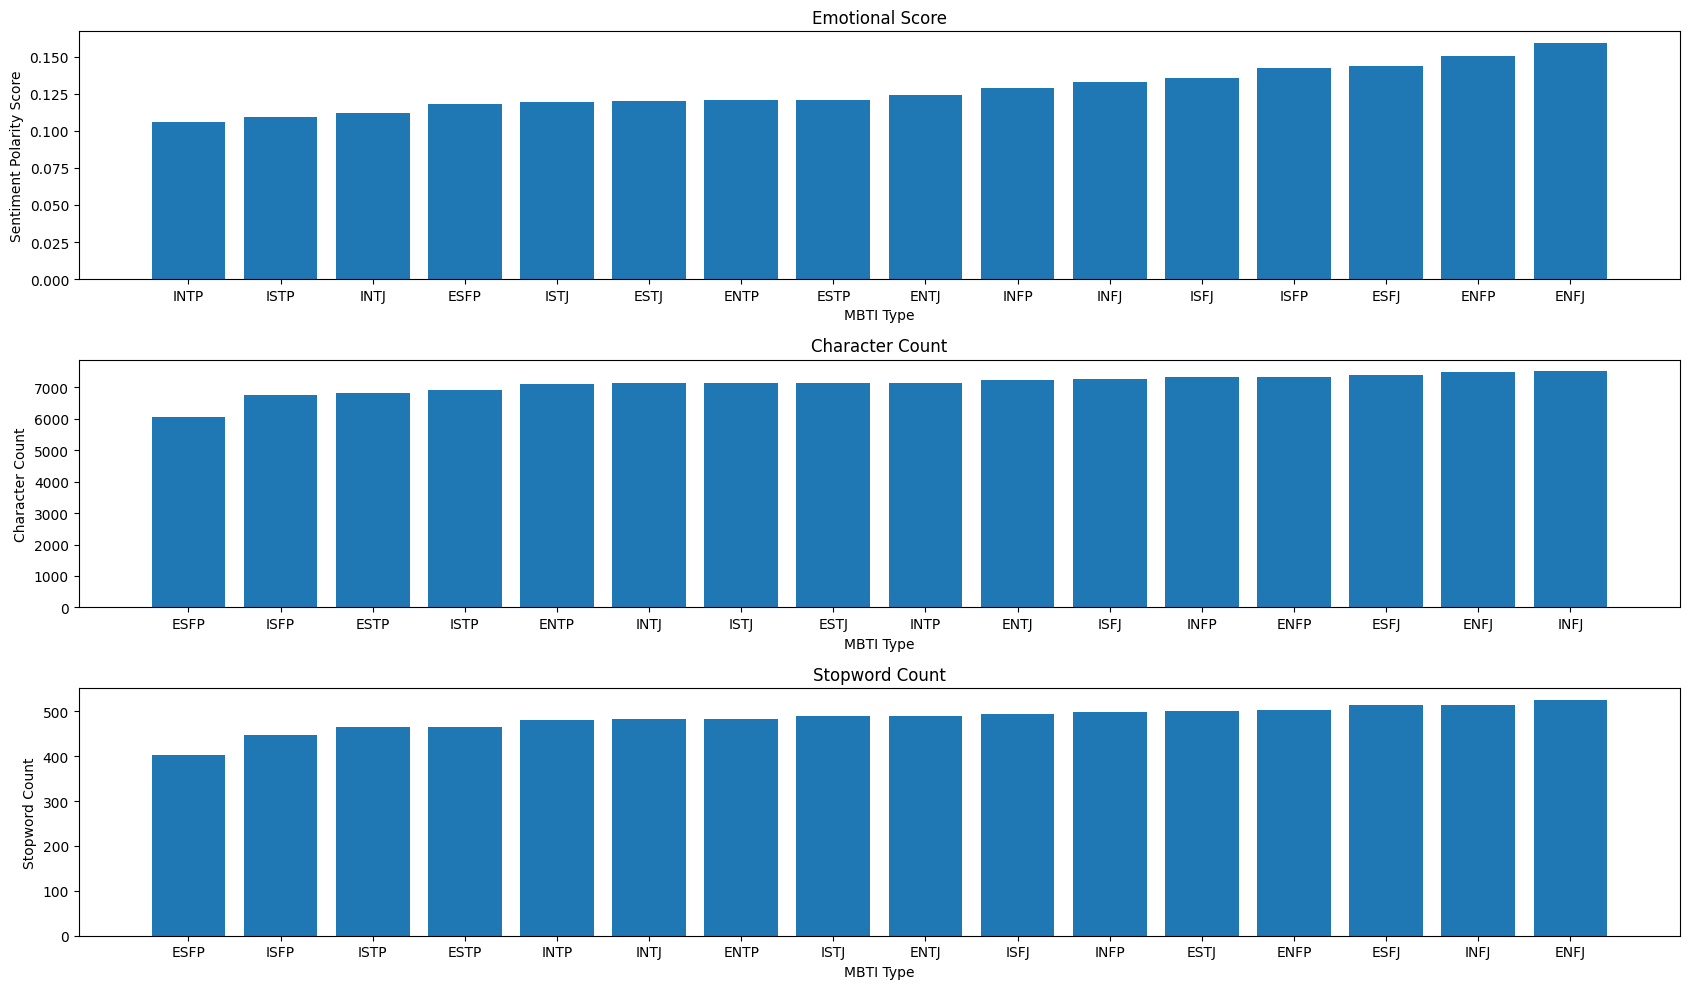

In [129]:
fig, ax = plt.subplots(3, figsize=(17, 10))

ax[0].bar(df_list[2]['type'], df_list[2]['sentiment'])
ax[0].set(
    xlabel='MBTI Type',
    ylabel='Sentiment Polarity Score',
    title='Emotional Score'
)

ax[1].bar(df_list[0]['type'], df_list[0]['char_count'])
ax[1].set(
    xlabel='MBTI Type',
    ylabel='Character Count',
    title='Character Count'
)
ax[2].bar(df_list[1]['type'], df_list[1]['stopwords'])
ax[2].set(
    xlabel='MBTI Type',
    ylabel='Stopword Count',
    title='Stopword Count'
)
fig.tight_layout()

In [130]:
stopwords = stopwords.words('english')

In [131]:
noStopWordPosts = df['posts'].apply(lambda words : ' '.join(word.lower() for word in words.split() if word not in stopwords))

In [132]:
df['posts'] = noStopWordPosts

In [133]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [134]:
df

,type,posts,char_count,stopwords,sentiment
0,INFJ,'http://www.youtube.com/watch?v=qsxhcwe3krw|||...,4652,221,0.145127
1,ENTP,'i'm finding lack posts alarming.|||sex boring...,7053,464,0.163282
2,INTP,'good one _____ https://www.youtube.com/watch?...,5265,309,0.174137
3,INTJ,"'dear intp, i enjoyed conversation day. esoter...",6271,430,0.114959
4,ENTJ,'you're fired.|||that's another silly misconce...,6111,411,0.056805
...,...,...,...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edhb_h908||...,5011,332,0.134898
8671,ENFP,'so...if thread already exists someplace else ...,7902,500,0.280931
8672,INTP,'so many questions things. i would take purple...,5772,366,0.105284
8673,INFP,'i conflicted right comes wanting children. i ...,9479,713,0.117591


In [135]:
from PIL import Image
import numpy as np
from os import path
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [170]:
text = str(df['posts']).replace('  ', ' ')
wordcloud = WordCloud(background_color='white').generate(text)

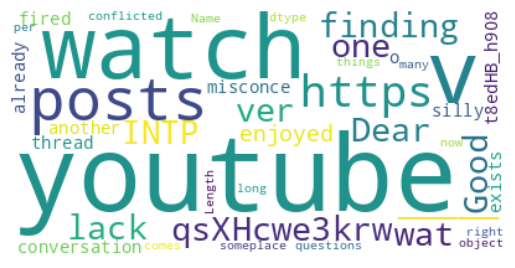

In [171]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
person_mask = np.array(Image.open('/content/manpng.parspng.com-2.png'))
person_mask

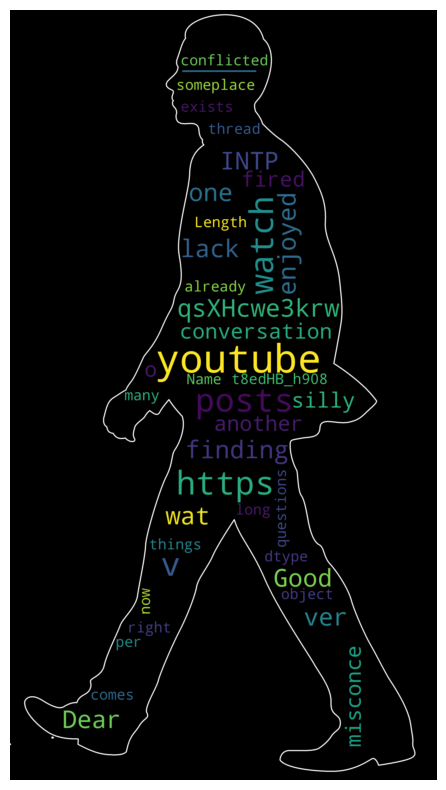

In [175]:
wc = WordCloud(
    background_color="black",
    mask=person_mask,
    max_words=1000,
    contour_width=10,
    contour_color='white'
)

wc.generate(text)
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()